In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\wine.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [6]:
df.shape

(1599, 12)

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# classifaction problem 

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# no null values proceed data set 

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
#data visualization

<AxesSubplot:xlabel='quality', ylabel='count'>

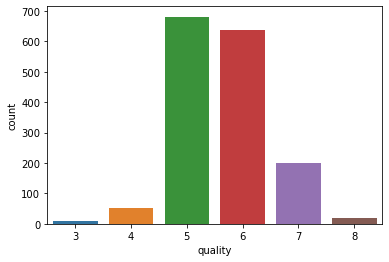

In [13]:
sns.countplot(df['quality'])

In [14]:
x=df.drop('quality',axis=1)
y=df['quality']

In [15]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
# so class imbalance use sampling techniques used

In [17]:
!pip install imbalanced-learn==0.6.0

In [18]:
!pip install scikit-learn==0.22.1

  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [19]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y = SM.fit_resample(x,y)

In [20]:
y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

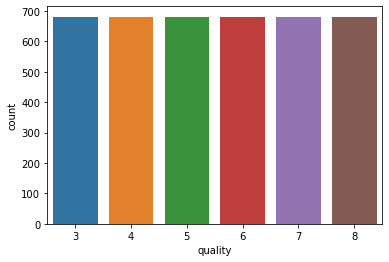

In [21]:
sns.countplot(y)

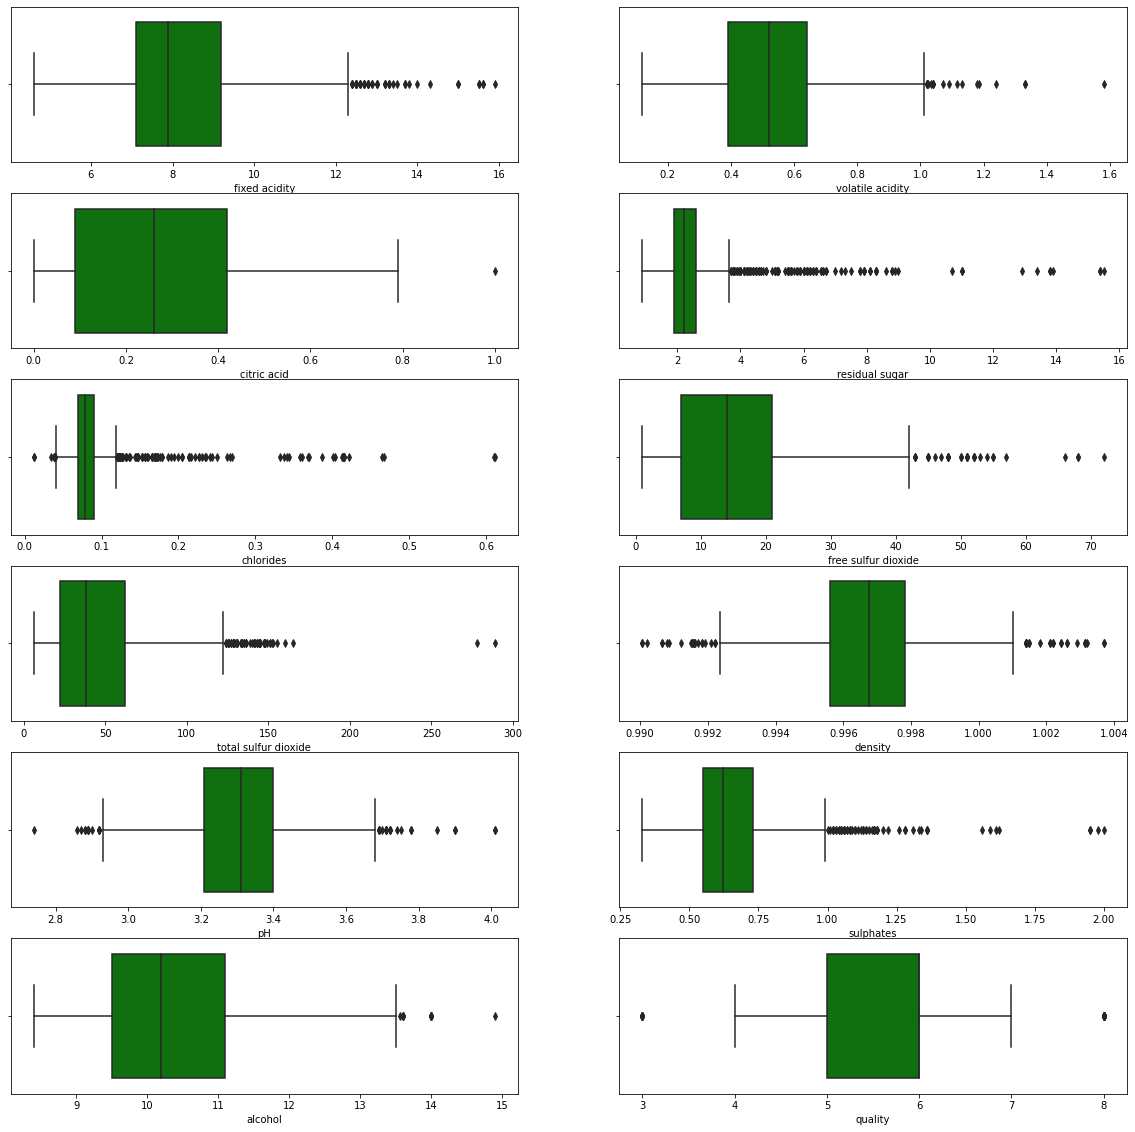

In [22]:
collist=df.columns.values
ncol=2
nrows=6
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout

[]

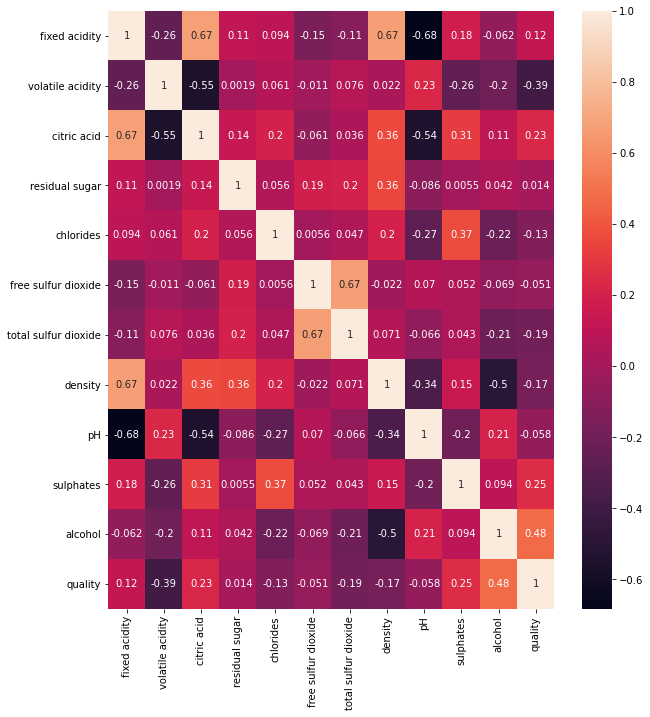

In [23]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

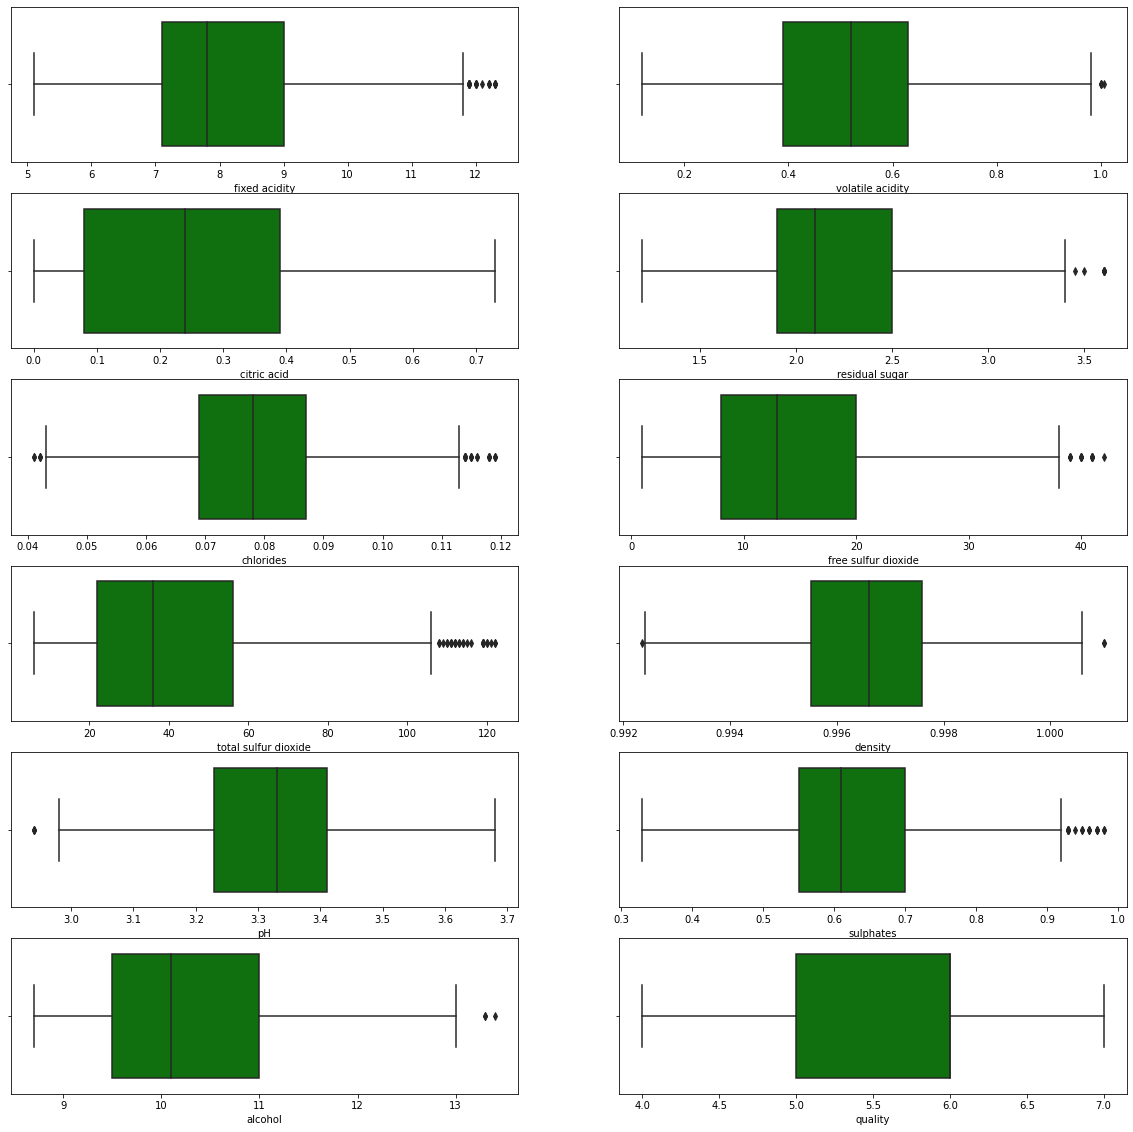

In [25]:
collist=df_new.columns.values
ncol=2
nrows=6
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='green')
    plt.tight_layout

In [26]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [27]:
# some columns skewness so remove skewness used log transformation

In [28]:
df['residual sugar'] = np.log(df['residual sugar'])
df['chlorides'] = np.log(df['chlorides'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['sulphates'] = np.log(df['sulphates'])
df['fixed acidity'] = np.log(df['fixed acidity'])
df['volatile acidity'] = np.log(df['volatile acidity'])
df['alcohol'] = np.log(df['alcohol'])

In [29]:
df.skew()

fixed acidity           0.393915
volatile acidity       -0.434385
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.661856
quality                 0.217802
dtype: float64

<AxesSubplot:>

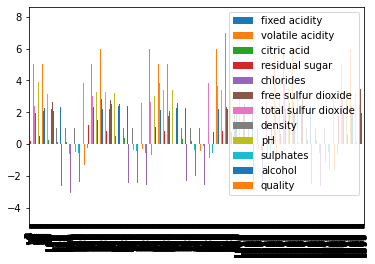

In [30]:
df.plot.bar()

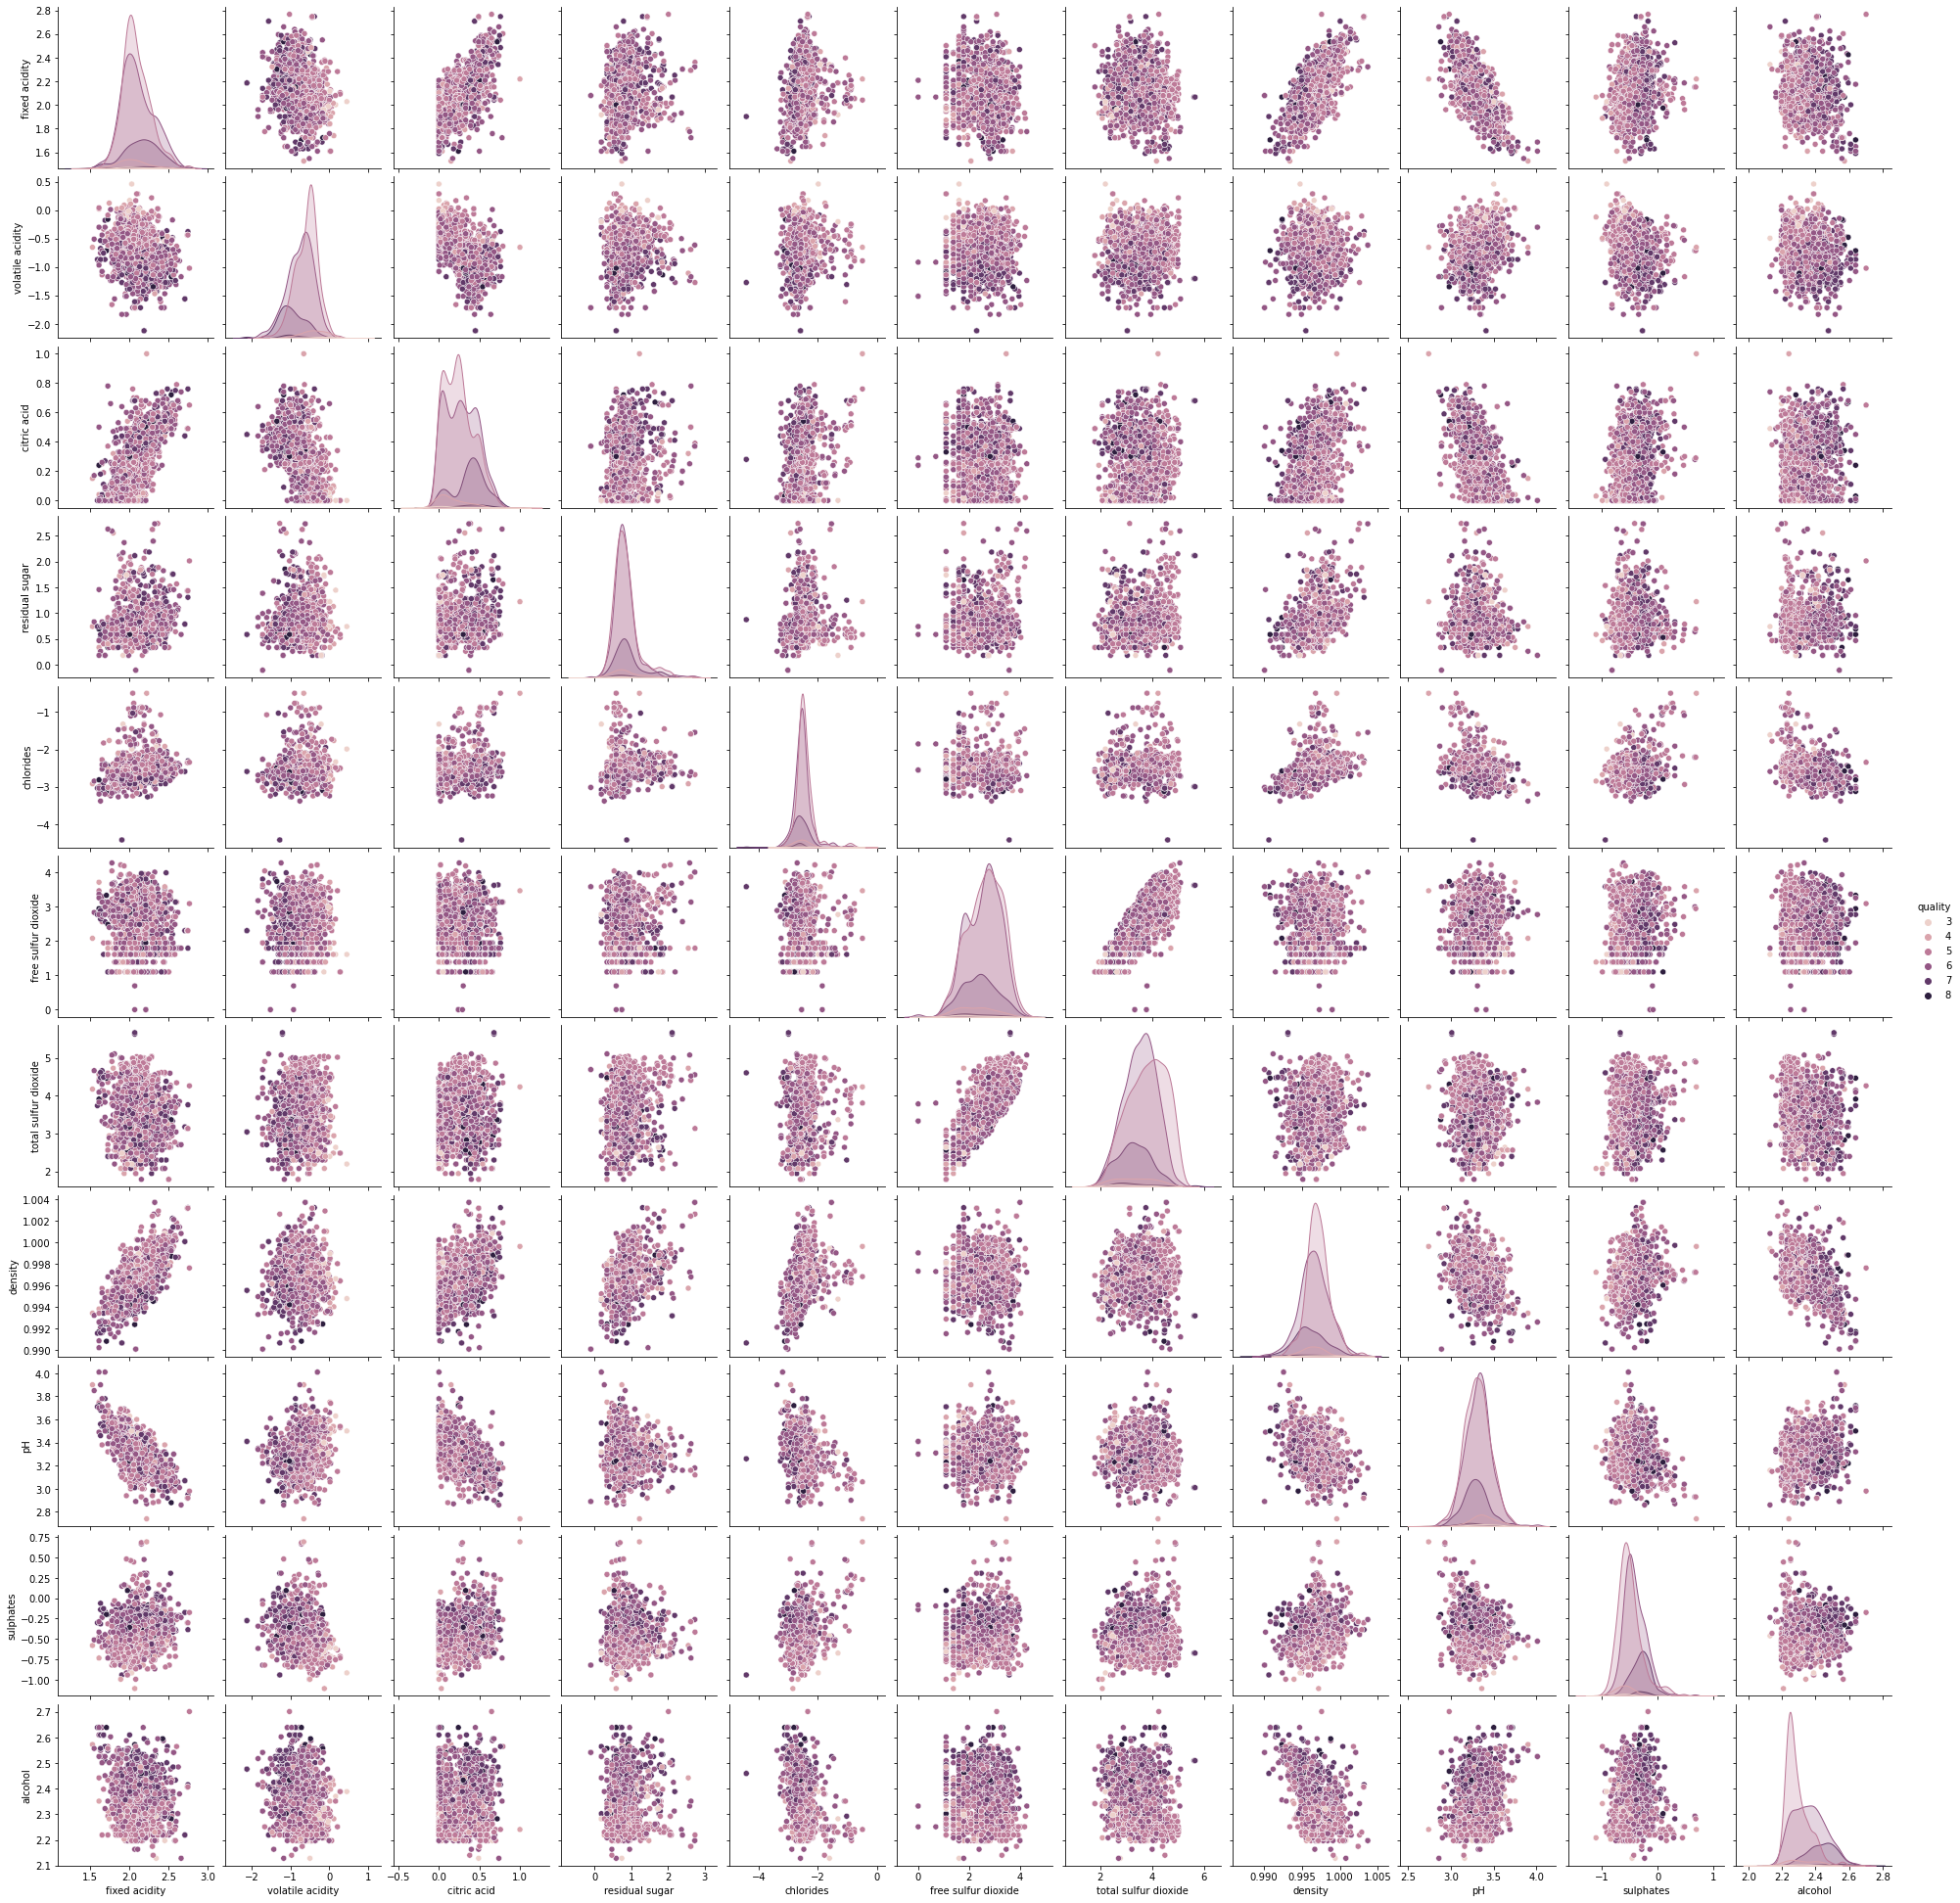

In [31]:
sns.pairplot(df, hue='quality')

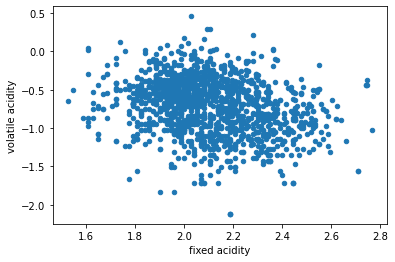

In [32]:
df.plot(kind='scatter',x='fixed acidity',y='volatile acidity');
plt.show()

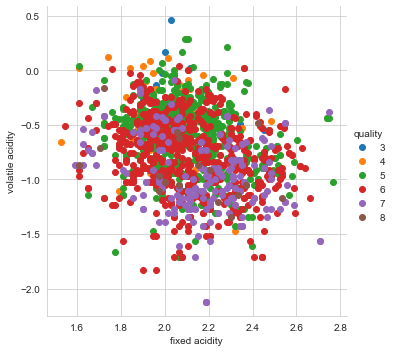

In [33]:
sns.set_style('whitegrid');
sns.FacetGrid(df,hue='quality',size=5)\
   .map(plt.scatter,'fixed acidity','volatile acidity')\
   .add_legend();
plt.show();

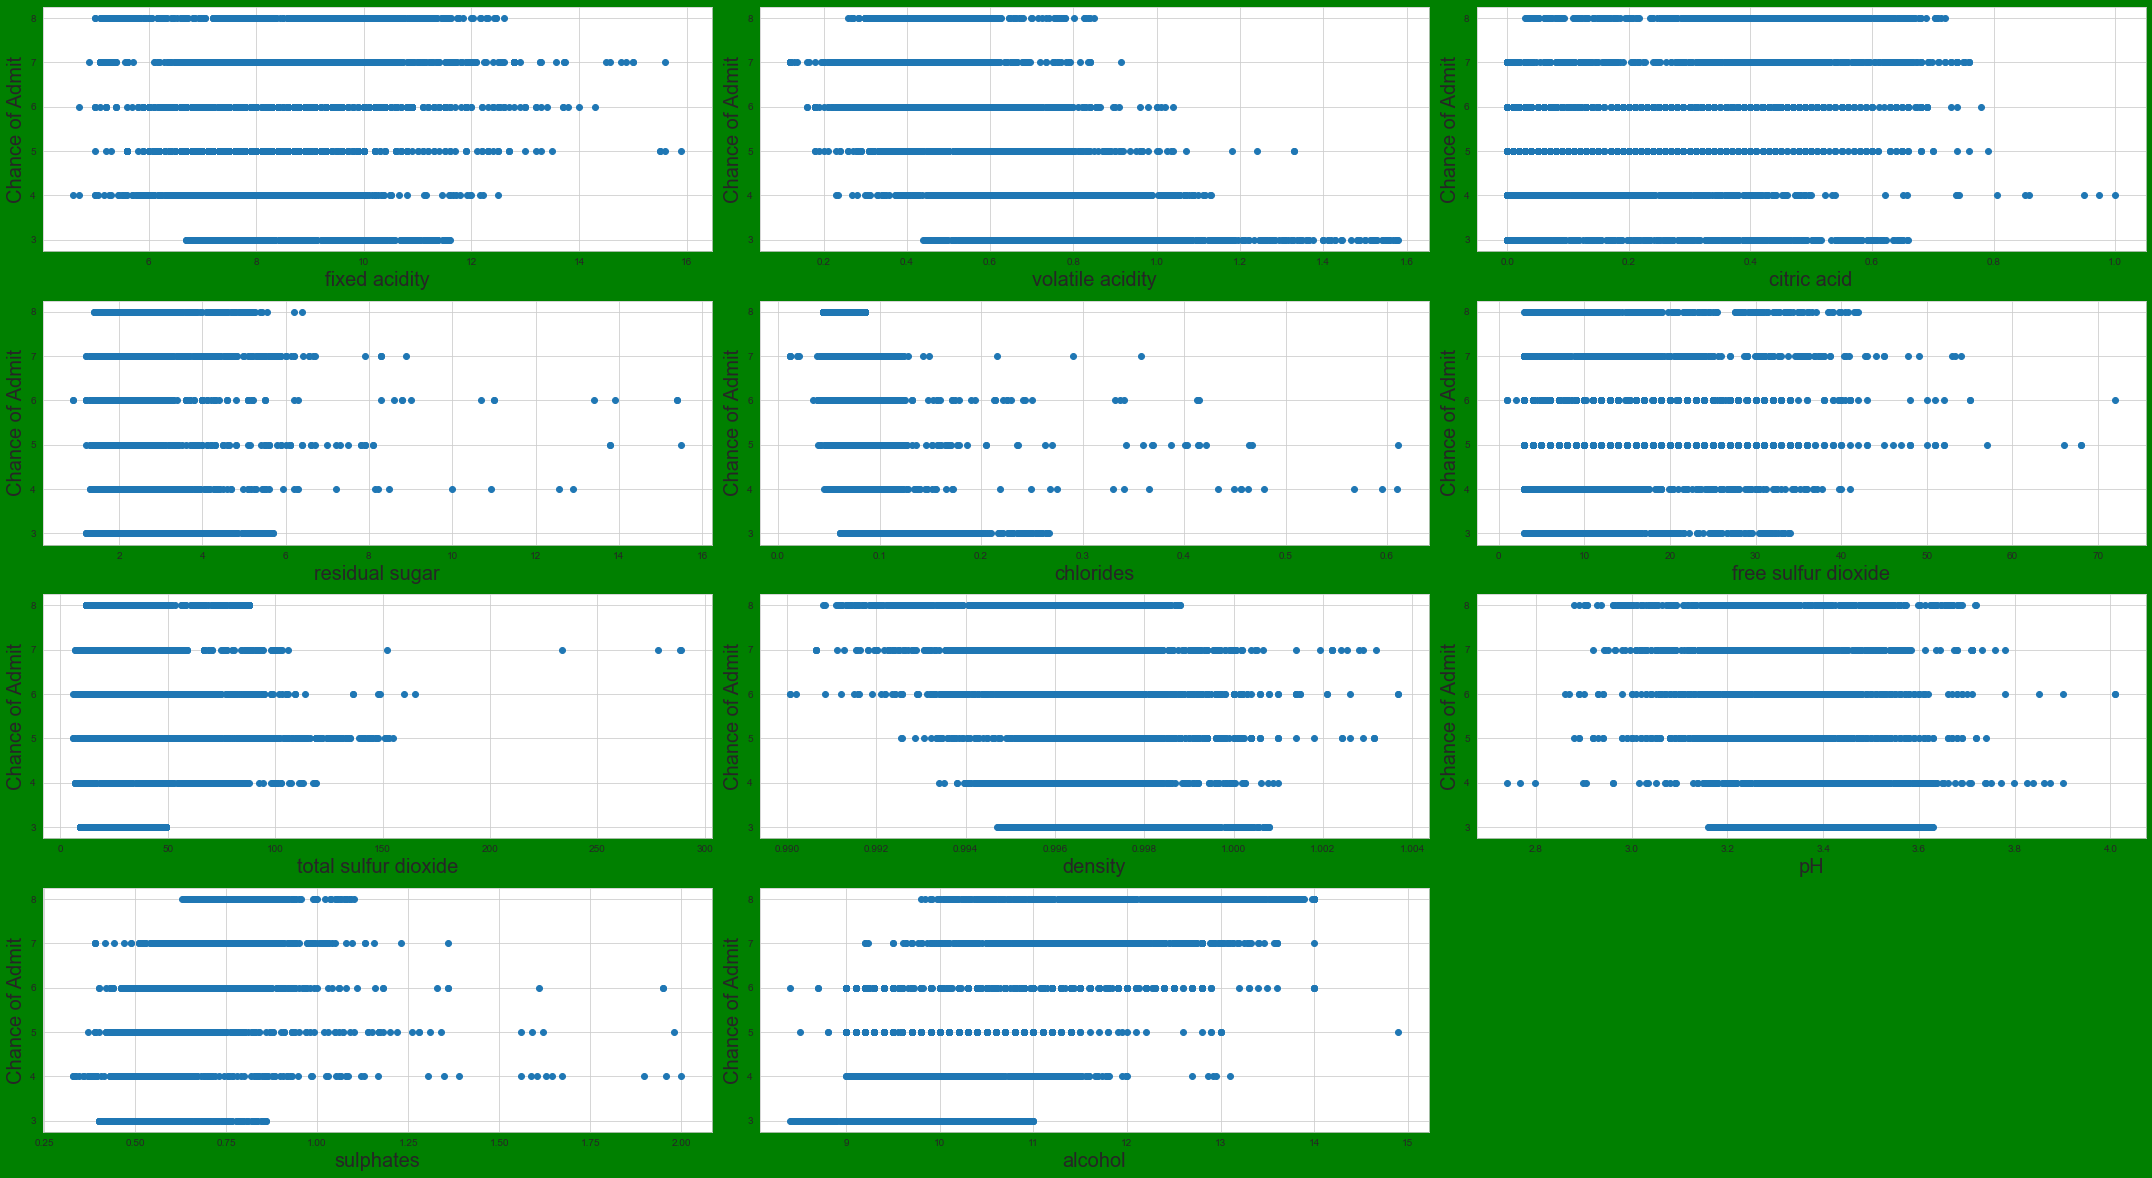

In [34]:
plt.figure(figsize=(30,20), facecolor='green')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax =plt.subplot(5,3,plotnumber)
        
        
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit', fontsize=20)
        plotnumber+=1 
        plt.tight_layout()

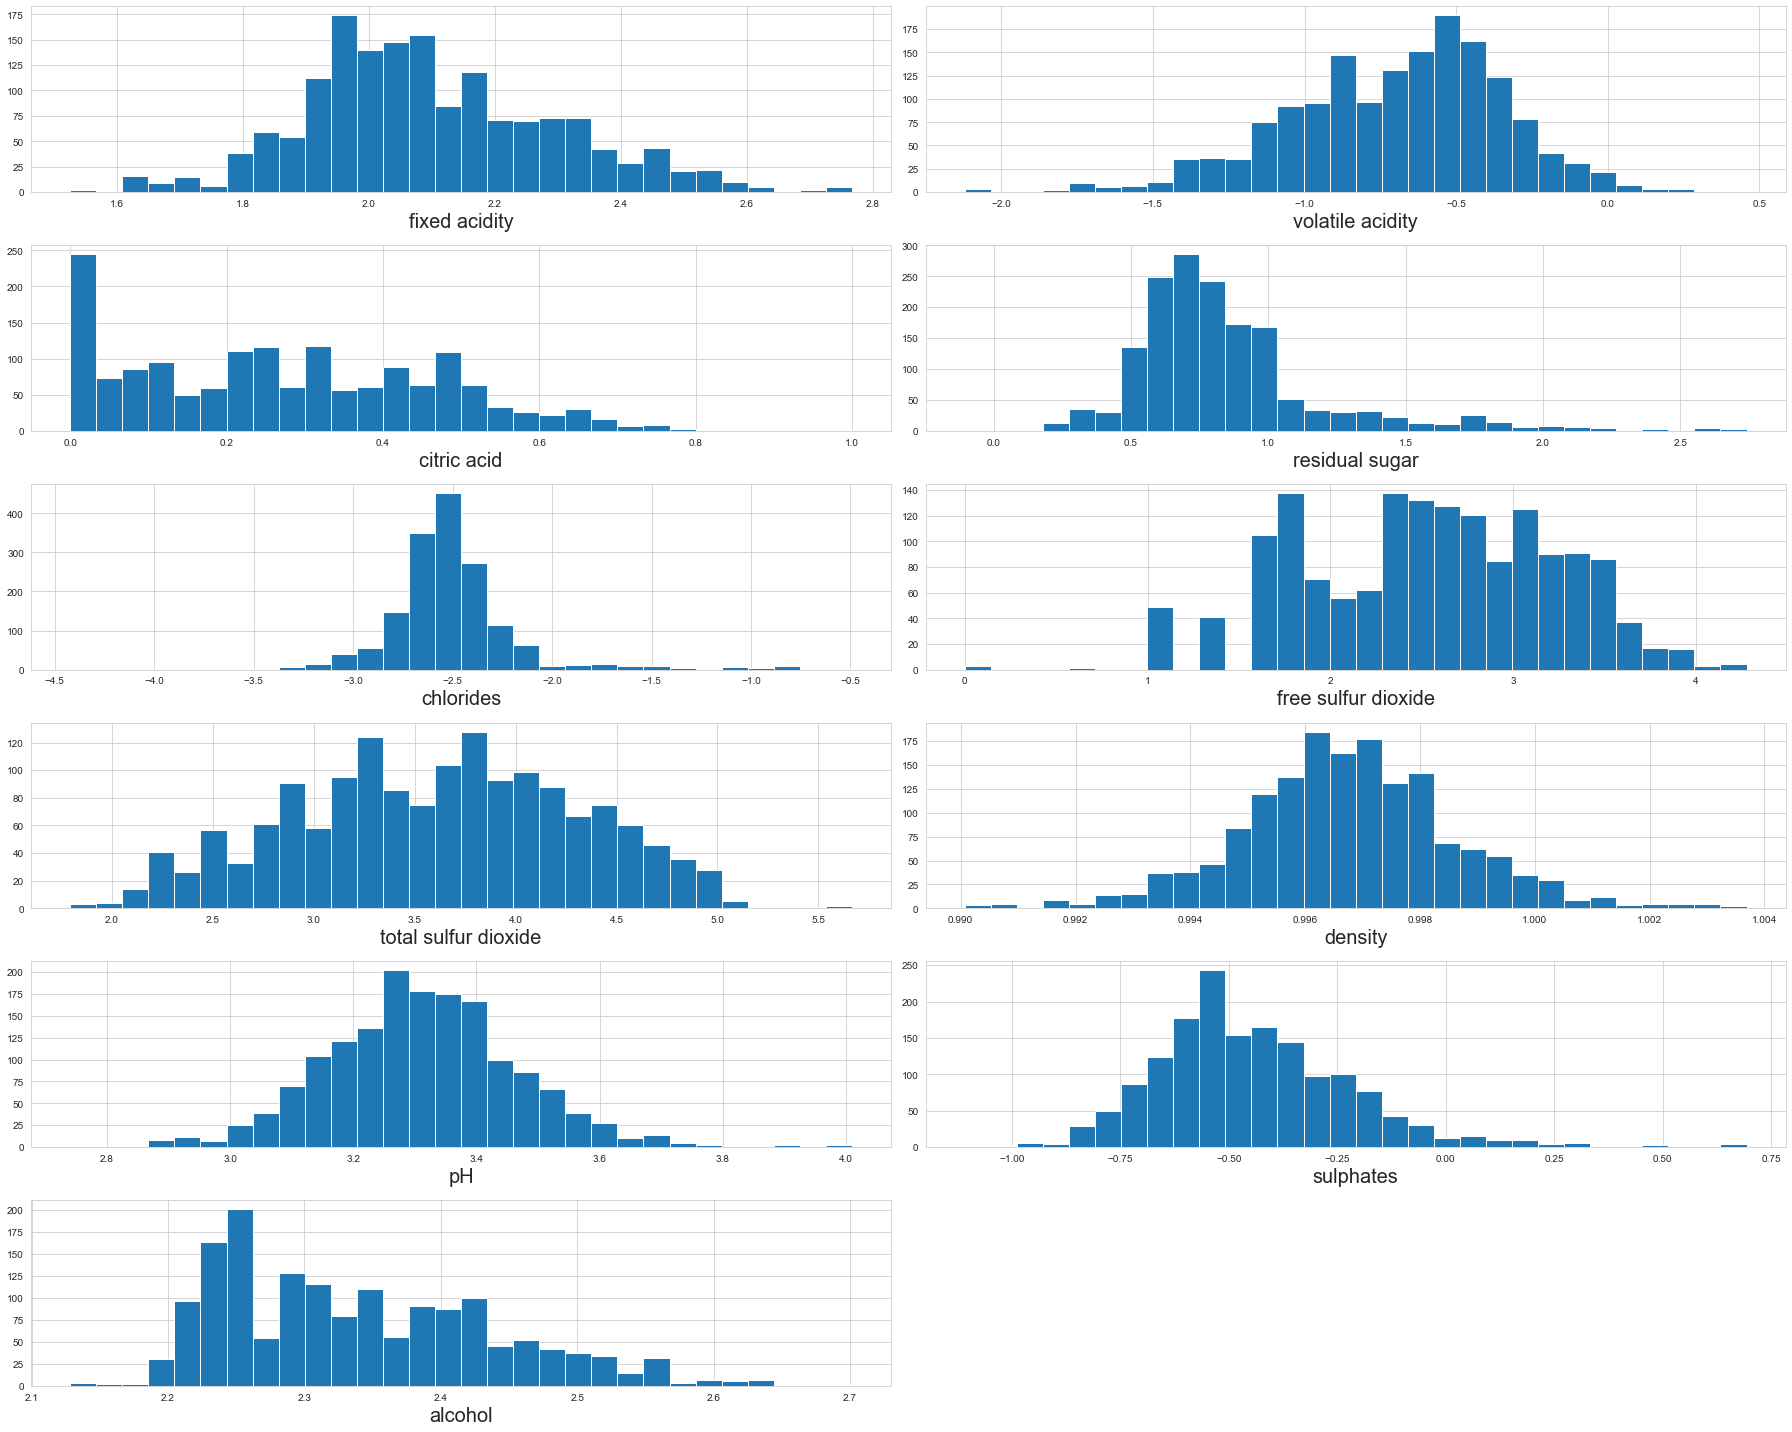

In [35]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in df:
    if plotnumber<12:
        ax = plt.subplot(6,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [36]:
# data cleaning complete so proceed ml algorthims

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [38]:
x = df.drop(columns=['quality'],axis=1)
y = df['quality']

In [39]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.28,random_state=98)

In [41]:
lr=LogisticRegression()
ad= AdaBoostClassifier()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()

# logistic regression

In [42]:
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=lr.predict(x_test)

In [44]:
acc = accuracy_score(y_test,y_pred)
acc

0.5714285714285714

In [45]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[  0,   1,   3,   0,   0,   0],
       [  0,   1,   8,   4,   0,   0],
       [  0,   0, 155,  51,   2,   0],
       [  0,   0,  61,  89,  13,   0],
       [  0,   0,   3,  41,  11,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

In [46]:
y_test.shape

(448,)

In [47]:
y_test.head()

104     5
429     6
512     6
718     5
1030    7
Name: quality, dtype: int64

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.08      0.13        13
           5       0.67      0.75      0.71       208
           6       0.47      0.55      0.51       163
           7       0.39      0.20      0.27        55
           8       0.00      0.00      0.00         5

    accuracy                           0.57       448
   macro avg       0.34      0.26      0.27       448
weighted avg       0.55      0.57      0.55       448



In [49]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.5703565830721004


# Adaboostclassifier

In [50]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [51]:
y_pred = ad.predict(x_test)

In [52]:
acc = accuracy_score(y_test,y_pred)
acc

0.5491071428571429

In [53]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[  1,   1,   2,   0,   0,   0],
       [  0,   1,   9,   3,   0,   0],
       [  2,   1, 156,  49,   0,   0],
       [  1,   1,  73,  88,   0,   0],
       [  0,   0,   7,  48,   0,   0],
       [  0,   0,   0,   5,   0,   0]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.25      0.25      0.25         4
           4       0.25      0.08      0.12        13
           5       0.63      0.75      0.69       208
           6       0.46      0.54      0.49       163
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00         5

    accuracy                           0.55       448
   macro avg       0.26      0.27      0.26       448
weighted avg       0.47      0.55      0.50       448



In [55]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.507823275862069


# randomforestclassifier

In [56]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred = rf.predict(x_test)

In [58]:
acc = accuracy_score(y_test,y_pred)
acc

0.6339285714285714

In [59]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[  0,   0,   4,   0,   0,   0],
       [  0,   1,  10,   2,   0,   0],
       [  0,   1, 153,  52,   2,   0],
       [  0,   1,  46, 108,   8,   0],
       [  0,   0,   4,  29,  22,   0],
       [  0,   0,   0,   4,   1,   0]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.08      0.12        13
           5       0.71      0.74      0.72       208
           6       0.55      0.66      0.60       163
           7       0.67      0.40      0.50        55
           8       0.00      0.00      0.00         5

    accuracy                           0.63       448
   macro avg       0.38      0.31      0.32       448
weighted avg       0.62      0.63      0.62       448



In [61]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.5709894200626959


# decision tree classifier

In [62]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred = dt.predict(x_test)

In [64]:
acc = accuracy_score(y_test,y_pred)
acc

0.5915178571428571

In [65]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[  0,   1,   2,   1,   0,   0],
       [  0,   3,   2,   8,   0,   0],
       [  0,   9, 136,  55,   7,   1],
       [  0,   1,  48,  98,  15,   1],
       [  0,   3,   9,  15,  27,   1],
       [  0,   0,   0,   4,   0,   1]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.18      0.23      0.20        13
           5       0.69      0.65      0.67       208
           6       0.54      0.60      0.57       163
           7       0.55      0.49      0.52        55
           8       0.25      0.20      0.22         5

    accuracy                           0.59       448
   macro avg       0.37      0.36      0.36       448
weighted avg       0.59      0.59      0.59       448



In [67]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.47466888714733546


In [68]:
# so best model use metrics so consider Logistic Regression

In [69]:
# so hyper parameter tuning best model

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid_param = {'random_state':[3,9,23,7,5],
              'max_iter':[6,3,4,9],
              'multi_class':['auto','ovr','multinomial'],
              'n_jobs':[6,4,7,8,3]}

grid_search = GridSearchCV(estimator=lr,param_grid=grid_param,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [6, 3, 4, 9],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [6, 4, 7, 8, 3],
                         'random_state': [3, 9, 23, 7, 5]})

In [73]:
grid_search.best_params_

{'max_iter': 6, 'multi_class': 'auto', 'n_jobs': 6, 'random_state': 3}

In [74]:
mod = LogisticRegression(random_state=3,multi_class='auto',n_jobs=6,max_iter=6)
mod.fit(x_train,y_train)
pred = mod.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc*100)

59.15178571428571


# save the model

In [75]:
import joblib
joblib.dump(mod,'redwine.pkl')

['redwine.pkl']